* can_data를 이용하여
* (1) 계급 구간의 개수가 5개인 도수 분포포를 작성하고,
* (2) 각 구간의 도수를 이용하여 pareto graph 를 완성하시오.
* 파레토 그래프의 선 그래프는 막대그래프와 중첩되어야 합니다.

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# 표본 데이터
can_data = np.array([
    101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100,
    98.8, 98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2,
    101.4, 98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100,
    99.7, 100.9, 99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5,
    101.5, 98.2, 99.2, 98.6, 101.4, 102.1, 102.9, 100.8,
    99.4, 103.7, 100.3, 100.2, 101.1, 101.8, 100, 101.2,
    100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1,
    101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
    101.2, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2
])

print(len(can_data))

80


In [45]:
bins = np.linspace(min(can_data)-0.5, max(can_data)+0.5, 6)

intervals = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]

freq, bin_edge = np.histogram(can_data,bins=bins)

rel_freq = np.round(freq / np.sum(freq),4)

df = pd.DataFrame({
    "Class" : [i+1 for i in range(len(freq))],
    "Class Bin" : intervals,
    "F" : freq,
    "RF" : rel_freq
})


total_row = ["Total",f"{bins[0]}~ {bins[-1]}",f"{len(can_data)}",f"{np.sum(rel_freq)}"]
df.loc[len(df)] = total_row
df


,Class,Class Bin,F,RF
0,1,95.0~96.84,3,0.0375
1,2,96.84~98.68,9,0.1125
2,3,98.68~100.52,38,0.475
3,4,100.52~102.36,26,0.325
4,5,102.36~104.2,4,0.05
5,Total,95.0~ 104.2,80,1.0


In [47]:
df_plot = df.iloc[:-1] # Total row remove
df_plot = df_plot.sort_values(by="F", ascending=False)
df_plot['CRF'] = df_plot['RF'].cumsum()

<Figure size 1000x600 with 0 Axes>

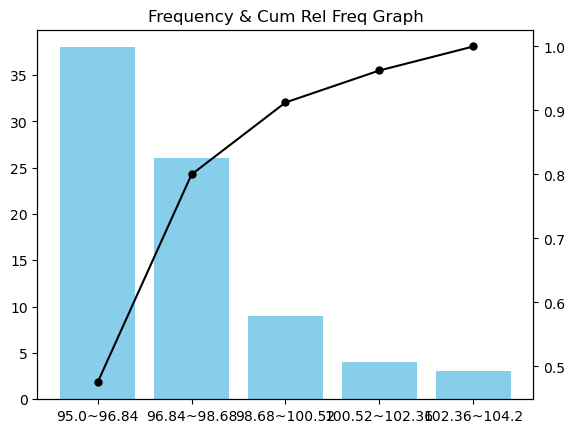

In [57]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.bar(intervals, df_plot["F"], color="skyblue", label="Frequency")
ax2 = ax.twinx()
ax2.plot(intervals, df_plot["CRF"], color="black",marker="o",markersize=5,label="Cum Rel Freq")
plt.title("Frequency & Cum Rel Freq Graph")
plt.show()